In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_boston
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder

In [ ]:
data = pd.read_csv('/dataset/creditcardmarketing-bbm.csv')

In [ ]:
data.head(3)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [ ]:
def highlight(data):
  highlight = data.value_counts().sort_index()
  clrs = ['grey' if (x < max(highlight)) else 'red' for x in highlight]
  return clrs

In [ ]:
def highlight2(data):
  highlight = data.value_counts()
  clrs = ['grey' if (x < max(highlight)) else 'red' for x in highlight]
  return clrs

# **Analisis & Eksplorasi Data**

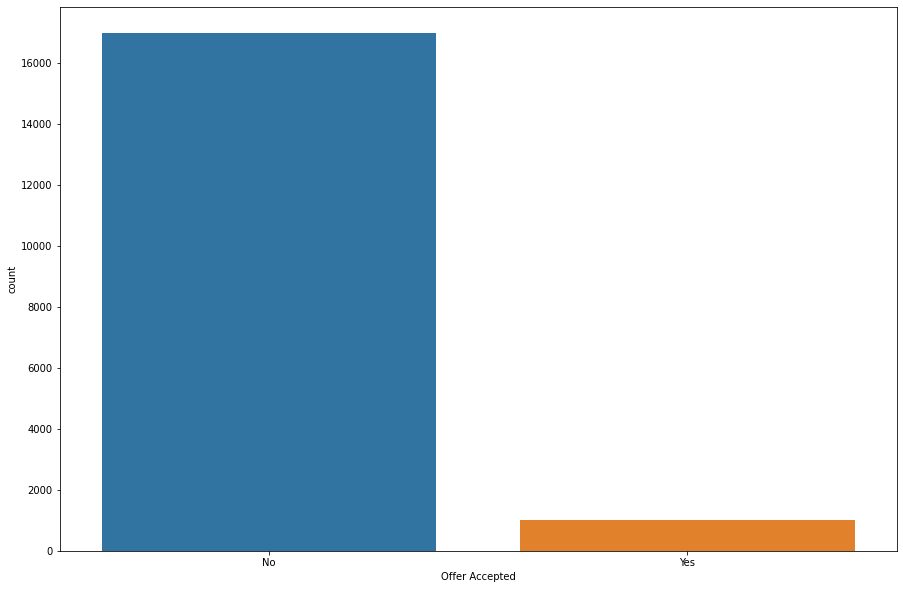

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=data, x='Offer Accepted');

Jumlah data tidak seimbang untuk target dapat diatasi dengan oversampling

In [ ]:
data['Offer Accepted'].value_counts()

No     16977
Yes     1023
Name: Offer Accepted, dtype: int64

Memisahkan data accepted dan not accepted

In [ ]:
yes_data = data.loc[data['Offer Accepted'] == 'Yes']
no_data = data.loc[data['Offer Accepted'] == 'No']

In [ ]:
yes_data.head(3)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
27,28,Yes,Air Miles,Letter,Medium,1,No,Low,1,1,2,No,769.50,54.0,515.0,1204.0,1305.0
45,46,Yes,Air Miles,Postcard,High,1,Yes,Low,2,1,5,Yes,851.25,206.0,467.0,1744.0,988.0
50,51,Yes,Air Miles,Postcard,Low,1,No,High,2,1,2,Yes,931.75,1536.0,1232.0,597.0,362.0


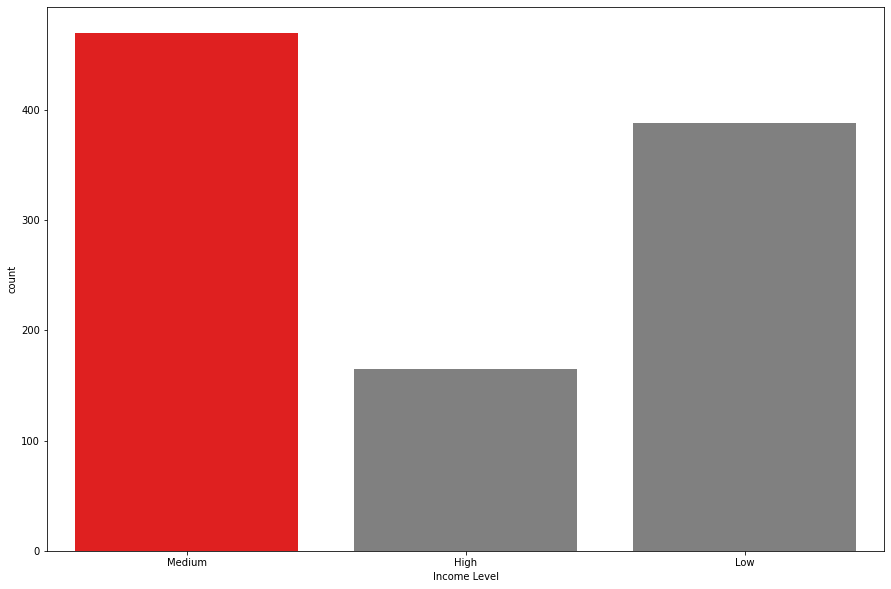

In [ ]:
plt.figure(figsize=(15,10))
clrs = highlight2(yes_data['Income Level'])
sns.countplot(data=yes_data, x='Income Level', palette=clrs);

Kebanyakan offering yang di accept mmemiliki income level medium

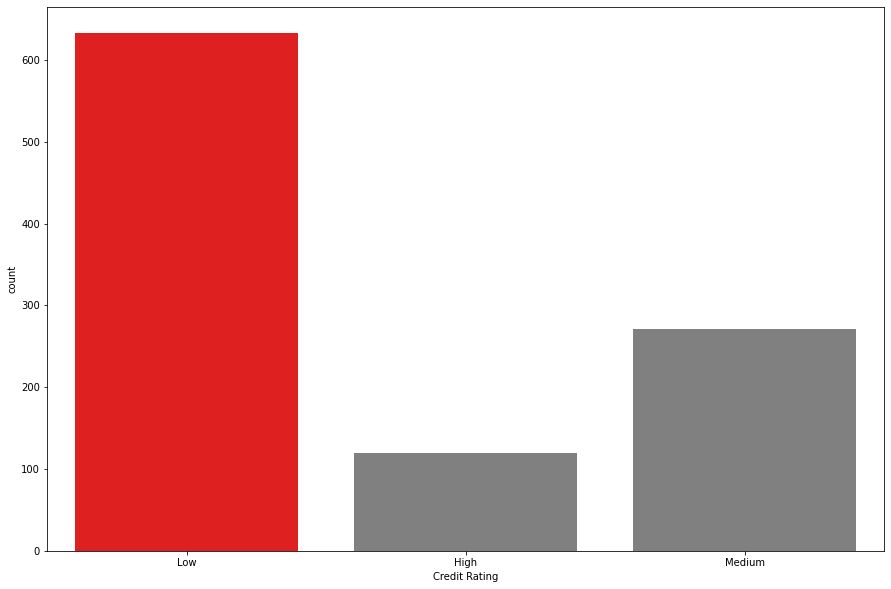

In [ ]:
plt.figure(figsize=(15,10))
clrs = highlight2(yes_data['Credit Rating'])
sns.countplot(data=yes_data, x='Credit Rating', palette=clrs);

Kebanyakan offering yang di accept mmemiliki credit rating low

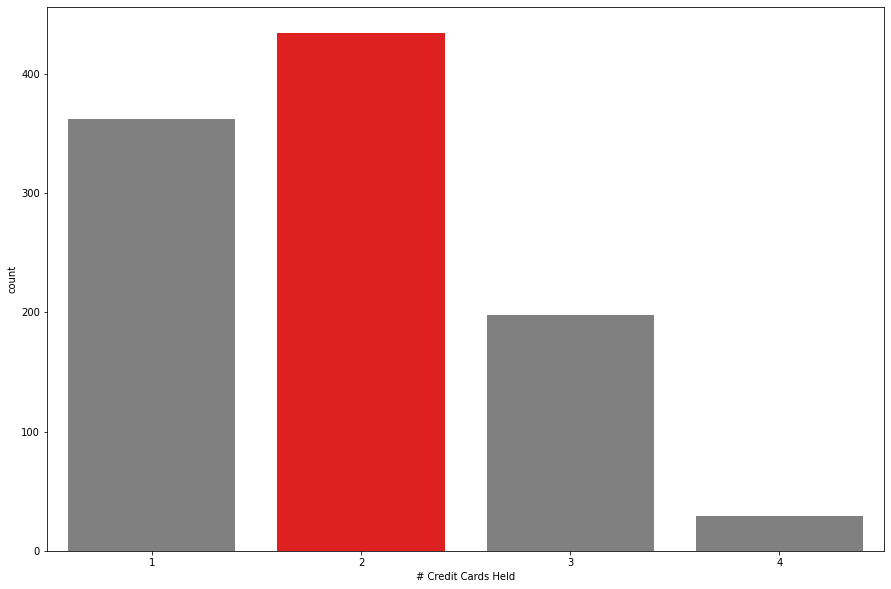

In [ ]:
plt.figure(figsize=(15,10))
clrs = highlight(yes_data['# Credit Cards Held'])
sns.countplot(data=yes_data, x='# Credit Cards Held', palette=clrs);

Dari skala 1 - 4 kebanyakan offering yang diterima yaitu orang yang memiliki kartu kredit dengan jumlah sebanyak 2 kartu

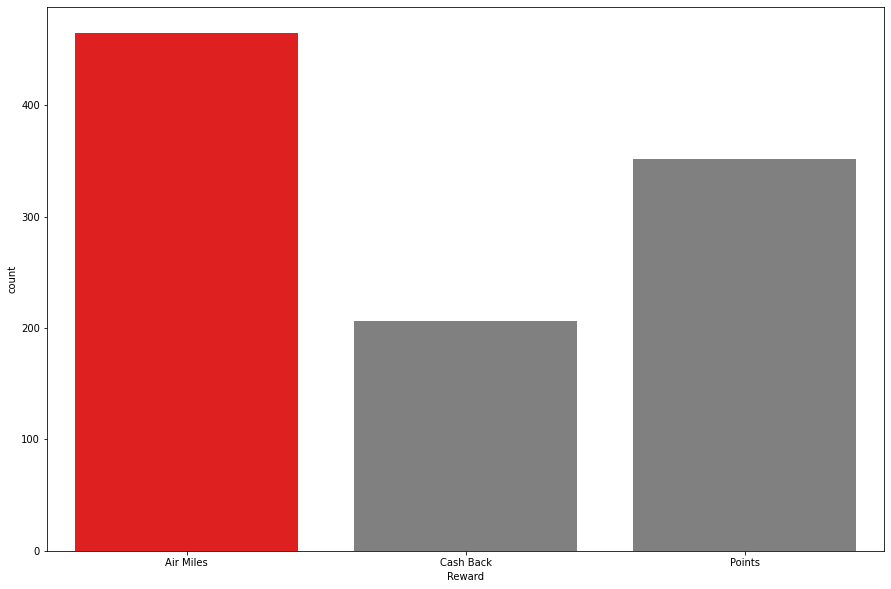

In [ ]:
plt.figure(figsize=(15,10))
clrs = highlight(yes_data['Reward'])
sns.countplot(data=yes_data, x='Reward', palette=clrs);

Mayoritas pengguna yang offeringnya di accept yaitu yang mendapatkan reward dalam bentuk miles

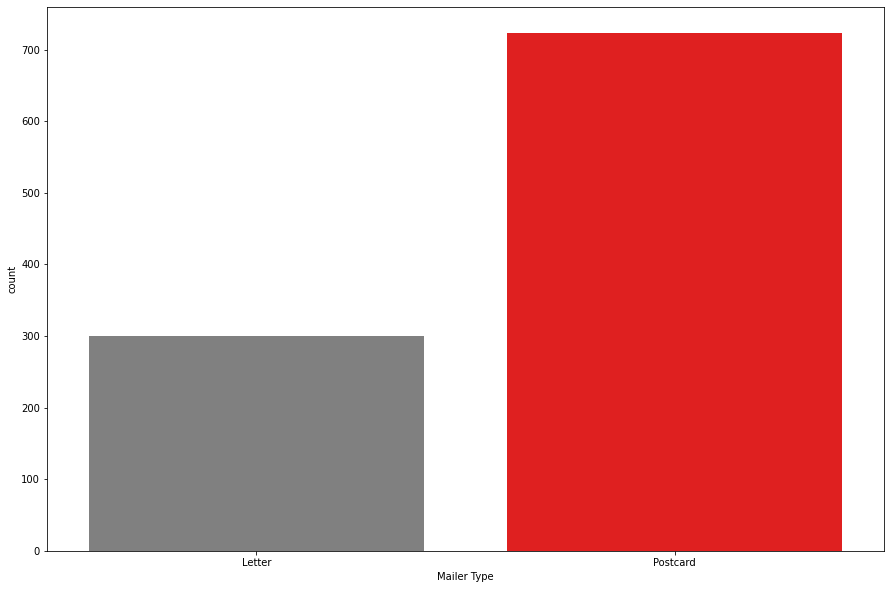

In [ ]:
plt.figure(figsize=(15,10))
clrs = highlight(yes_data['Mailer Type'])
sns.countplot(data=yes_data, x='Mailer Type', palette=clrs);

Untuk mailer type yang paling sering di accept berbentuk postcard

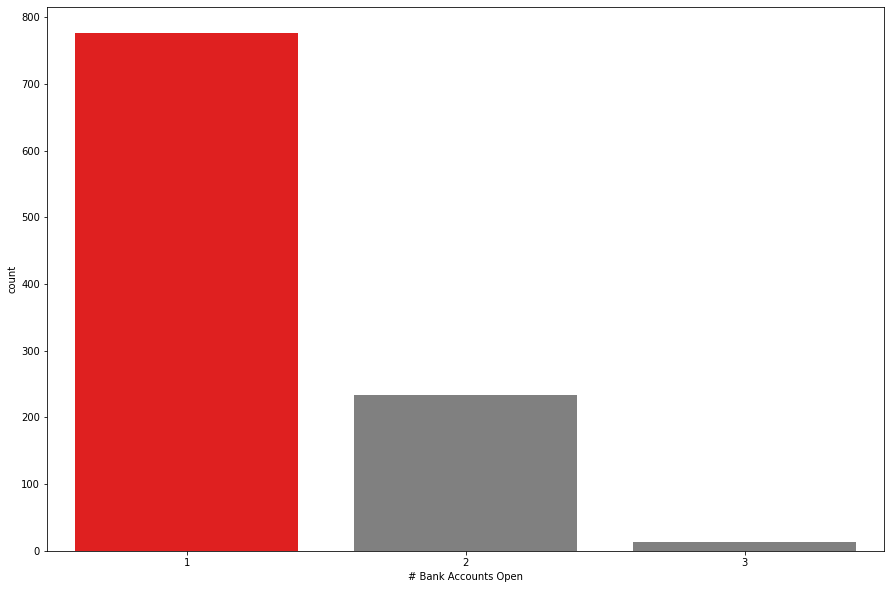

In [ ]:
plt.figure(figsize=(15,10))
clrs = highlight(yes_data['# Bank Accounts Open'])
sns.countplot(data=yes_data, x='# Bank Accounts Open', palette=clrs);

Kebanyakan offering yang di accept yaitu orang yang memiliki bank account dengan jumlah 1

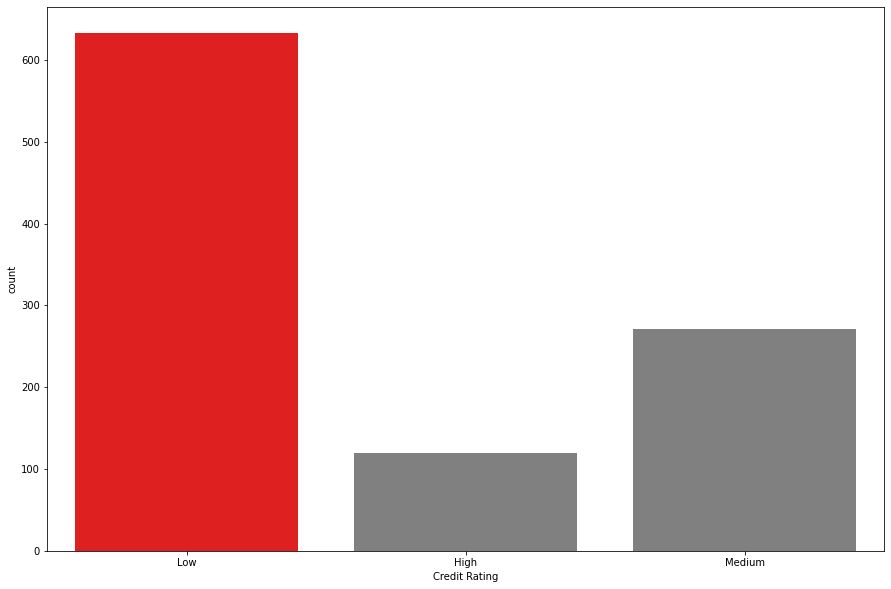

In [ ]:
plt.figure(figsize=(15,10))
clrs = highlight2(yes_data['Credit Rating'])
sns.countplot(data=yes_data, x='Credit Rating', palette=clrs);

Kebanyakan offering yang di accept memiliki credit rating low

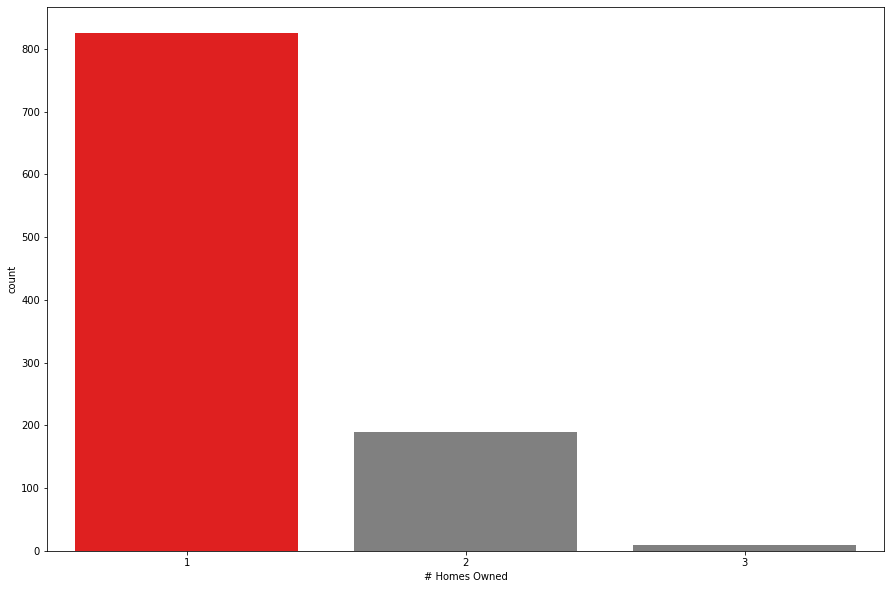

In [ ]:
plt.figure(figsize=(15,10))
clrs = highlight(yes_data['# Homes Owned'])
sns.countplot(data=yes_data, x='# Homes Owned', palette=clrs);

Kebanyakan offering yang di accept yaitu orang yang memiliki rumah 1

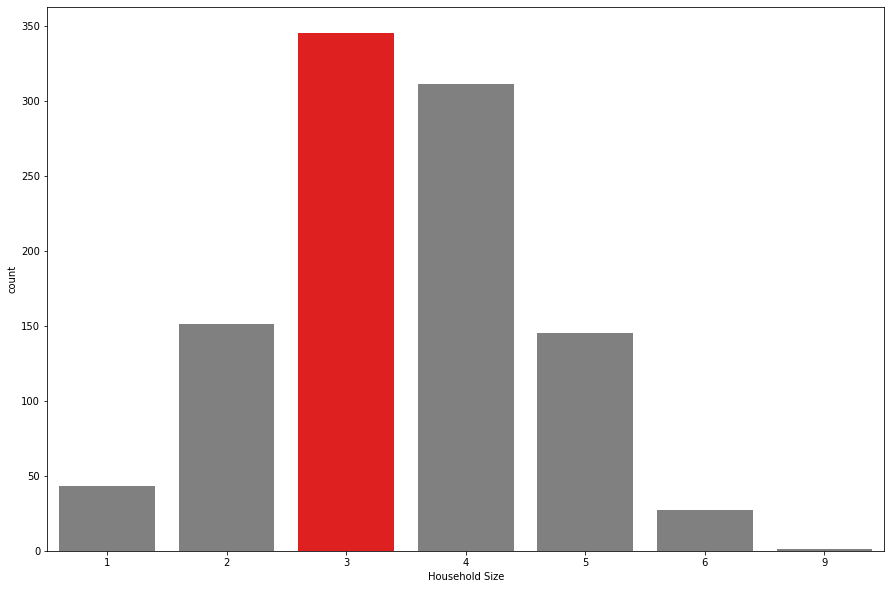

In [ ]:
plt.figure(figsize=(15,10))
clrs = highlight(yes_data['Household Size'])
sns.countplot(data=yes_data, x='Household Size', palette=clrs);

Kebanyakan offering yang di accept yaitu orang yang memiliki household size 3

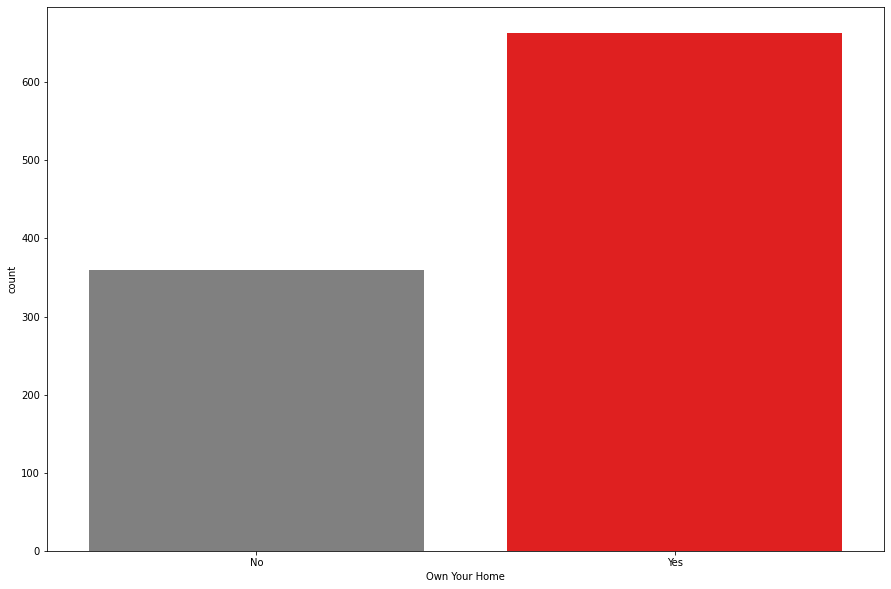

In [ ]:
plt.figure(figsize=(15,10))
clrs = highlight(yes_data['Own Your Home'])
sns.countplot(data=yes_data, x='Own Your Home', palette=clrs);

Kebanyakan offering yang di accept yaitu orang yang mempunyai kepemilikan atas rumah yang ditinggali

# **Preprocessing Data**

Mendeteksi outlier

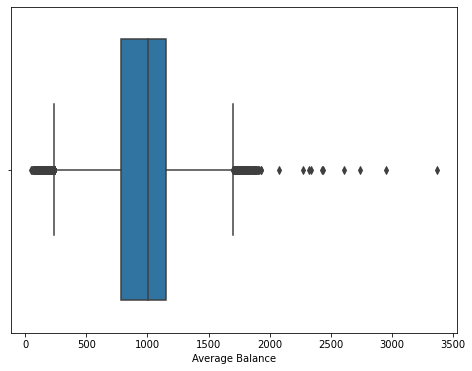

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Average Balance'])

In [ ]:
yes_data['Average Balance'].mean()

934.980166503428

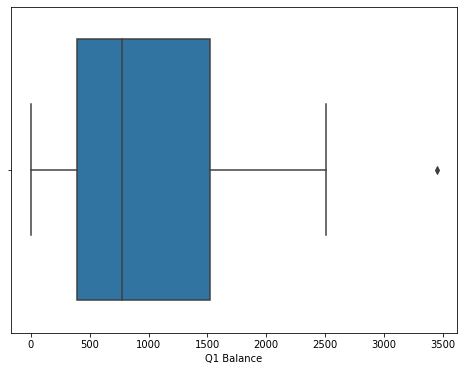

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Q1 Balance'])

In [ ]:
yes_data['Q1 Balance'].mean()

868.6709108716944

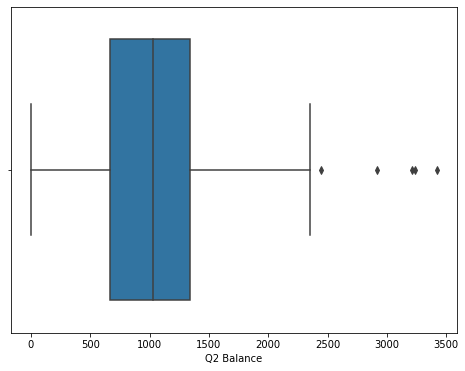

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Q2 Balance'])

In [ ]:
yes_data['Q2 Balance'].mean()

998.8139079333986

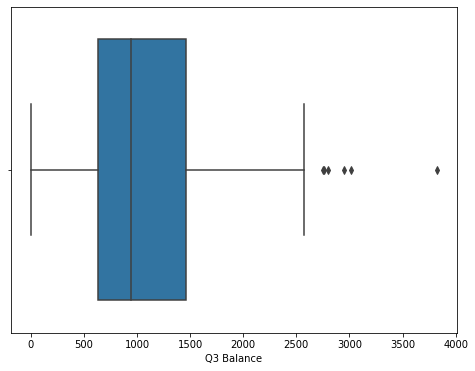

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Q3 Balance'])

In [ ]:
yes_data['Q3 Balance'].mean()

1060.9294809010773

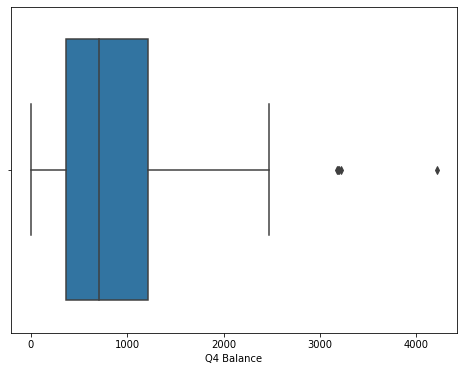

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Q4 Balance'])

In [ ]:
yes_data['Q4 Balance'].mean()

811.5063663075416

# Correllation Matrix

Membuat correllation matrix untuk memperkirakan variabel independen mana yang berkorelasi

In [ ]:
offer_accepted_encod= {'No':0,
                      'Yes':1}

reward_encod = {'Air Miles':0,
                'Cash Back':1,
                'Points':2}

mailer_type_encod = {'Postcard':0,
                    'Letter':1}

income_level_encod = {'Low':0,
                      'Medium':1,
                      'High':2}

overdraft_protection_encod = {'No':0,
                         'Yes':1}

credit_rating_encod = {'Low':0,
                      'Medium':1,
                      'High':2}

own_your_home_encod = {'No':0,
                         'Yes':1}

In [ ]:
data['Offer Accepted'] = data['Offer Accepted'].map(offer_accepted_encod)
real_data = data.drop(['Customer Number'], axis=1)
new_data = data

In [ ]:
new_data['Reward'] = new_data['Reward'].map(reward_encod)
new_data['Mailer Type'] = new_data['Mailer Type'].map(mailer_type_encod)
new_data['Income Level'] = new_data['Income Level'].map(income_level_encod)
new_data['Overdraft Protection'] = new_data['Overdraft Protection'].map(overdraft_protection_encod)
new_data['Credit Rating'] = new_data['Credit Rating'].map(credit_rating_encod)
new_data['Own Your Home'] = new_data['Own Your Home'].map(own_your_home_encod)

In [ ]:
new_data.head(3)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,0,0,1,2,1,0,2,2,1,4,0,1160.75,1669.0,877.0,1095.0,1002.0
1,2,0,0,1,1,1,0,1,2,2,5,1,147.25,39.0,106.0,78.0,366.0
2,3,0,0,0,2,2,0,1,2,1,2,1,276.50,367.0,352.0,145.0,242.0


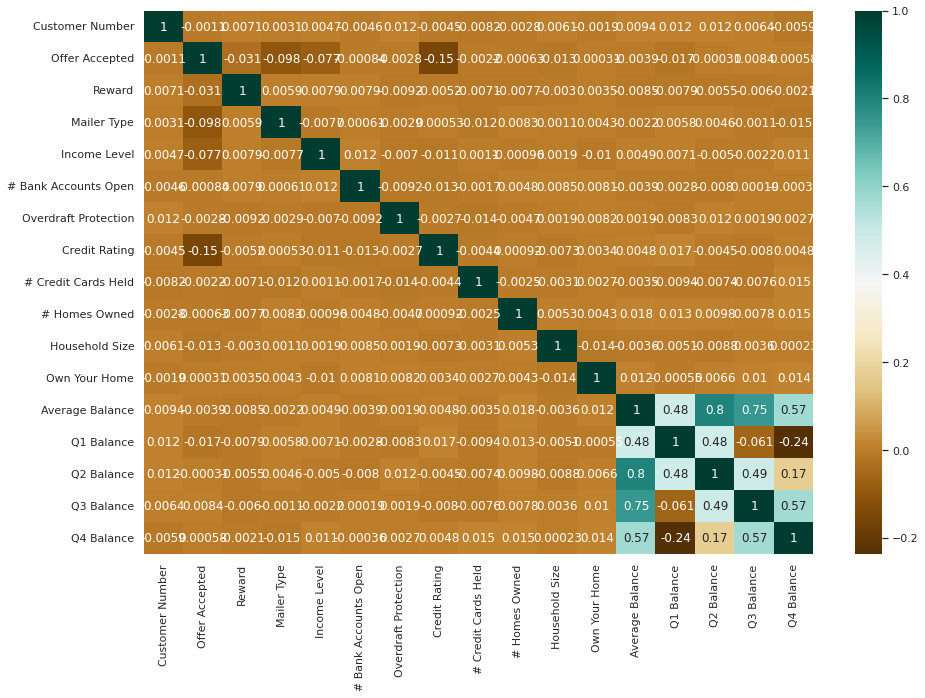

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(new_data.corr(), annot=True, cmap='BrBG');

Tidak ada satupun dari variabel yang berkorelasi kuat dengan target (Offer Accepted)

Delete unused column

In [ ]:
data = real_data.drop(['Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Offer Accepted        18000 non-null  int64  
 1   Reward                18000 non-null  object 
 2   Mailer Type           18000 non-null  object 
 3   Income Level          18000 non-null  object 
 4   # Bank Accounts Open  18000 non-null  int64  
 5   Overdraft Protection  18000 non-null  object 
 6   Credit Rating         18000 non-null  object 
 7   # Credit Cards Held   18000 non-null  int64  
 8   # Homes Owned         18000 non-null  int64  
 9   Household Size        18000 non-null  int64  
 10  Own Your Home         18000 non-null  object 
 11  Average Balance       17976 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 1.6+ MB


# Handling Missing Value Data

In [ ]:
data.isnull().sum()

Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


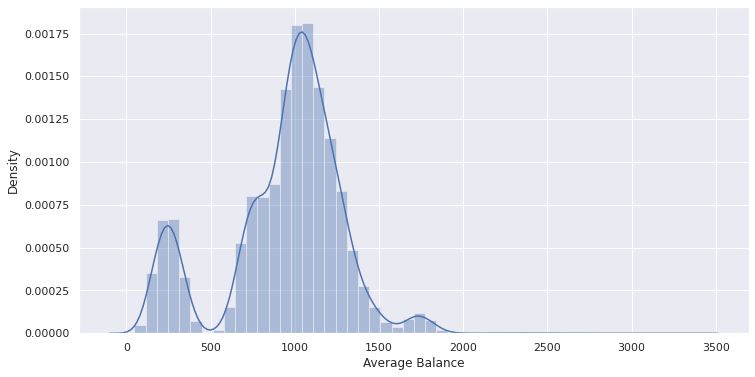

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme()
sns.distplot(data['Average Balance'])
plt.show()

jika dilihat dari distribusi data average balance, data ini memiliki distribusi yang tidak normal. sebaran mengalami left skew, dan kemungkinan ada outlier pada umur yang lebih besar

perlu diperhatikan ketika akan mengisi null value menggunakan "mean" karena jika data tidak berdistribusi normal, maka tidak disarankan untuk pengisian null value menggunakan "mean" dikarenakan nilai "mean" akan bergeser dipengaruhi nilai outlier sehingga nilai "mean" tidak mewakili keseluruhan data.

jika distribusi data tidak normal, lebih baik menggunakan median / modus, karena nilainya lebih tahan terhadap adanya outlier, sehingga lebih bisa mewakili keseluruhan data.

In [ ]:
data['Average Balance'].fillna(data['Average Balance'].median(), inplace = True)
data.isnull().sum()

Offer Accepted          0
Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Overdraft Protection    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
dtype: int64

# Handling Duplicate Data

In [ ]:
data[data.duplicated()].sum()

Offer Accepted                                                          0
Reward                  Cash BackAir MilesCash BackCash BackAir MilesP...
Mailer Type             PostcardPostcardLetterPostcardPostcardLetterLe...
Income Level            MediumMediumHighLowMediumHighLowLowHighMediumM...
# Bank Accounts Open                                                   16
Overdraft Protection                         NoNoNoNoNoNoNoNoNoNoNoNoNoNo
Credit Rating           LowMediumMediumMediumLowLowHighHighMediumHighL...
# Credit Cards Held                                                    27
# Homes Owned                                                          14
Household Size                                                         49
Own Your Home                      YesYesYesYesYesNoYesYesNoNoNoYesYesYes
Average Balance                                                  13261.25
dtype: object

In [ ]:
data.drop_duplicates(keep="first", inplace=True)
data[data.duplicated()]

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance


# Handling Outlier

In [ ]:
q1 = data['Average Balance'].quantile(.25)
q3 = data['Average Balance'].quantile(.75)
iqr = q3-q1

data['Average Balance'] = data['Average Balance'].mask(((data['Average Balance'] < (q3-(1.5*iqr)))), (q3-(1.5*iqr)))
data['Average Balance'] = data['Average Balance'].mask(((data['Average Balance'] > (q3+(1.5*iqr)))), (q3+(1.5*iqr)))
data.head(3)

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance
0,0,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75
1,0,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,605.25
2,0,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,605.25


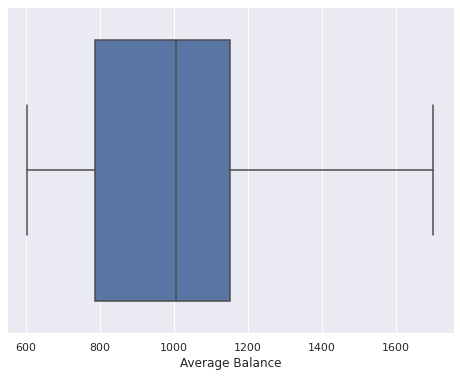

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Average Balance'])

# Feature encoding

In [ ]:
#nominal data encoding
nominal_encode_list = ['Reward', 'Mailer Type']

for x in nominal_encode_list:
  encoded_columns = pd.get_dummies(data[x])
  data = pd.concat([data,encoded_columns], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17986 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Offer Accepted        17986 non-null  int64  
 1   Reward                17986 non-null  object 
 2   Mailer Type           17986 non-null  object 
 3   Income Level          17986 non-null  object 
 4   # Bank Accounts Open  17986 non-null  int64  
 5   Overdraft Protection  17986 non-null  object 
 6   Credit Rating         17986 non-null  object 
 7   # Credit Cards Held   17986 non-null  int64  
 8   # Homes Owned         17986 non-null  int64  
 9   Household Size        17986 non-null  int64  
 10  Own Your Home         17986 non-null  object 
 11  Average Balance       17986 non-null  float64
 12  Air Miles             17986 non-null  uint8  
 13  Cash Back             17986 non-null  uint8  
 14  Points                17986 non-null  uint8  
 15  Letter             

In [ ]:
#Label encoder
hot_encoder_list = ['Income Level', 'Overdraft Protection', 'Credit Rating', 'Own Your Home']

for x in hot_encoder_list:
  ordinal_encoder = OrdinalEncoder( categories=[list(data[x].unique())] )

  #ubah dulu sebagai array
  y = np.array(data[x]).reshape(-1,1)
  ordinal_encoder.fit(y)
  data[f'{x}_encode'] = ordinal_encoder.transform(y)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17986 entries, 0 to 17999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Offer Accepted               17986 non-null  int64  
 1   Reward                       17986 non-null  object 
 2   Mailer Type                  17986 non-null  object 
 3   Income Level                 17986 non-null  object 
 4   # Bank Accounts Open         17986 non-null  int64  
 5   Overdraft Protection         17986 non-null  object 
 6   Credit Rating                17986 non-null  object 
 7   # Credit Cards Held          17986 non-null  int64  
 8   # Homes Owned                17986 non-null  int64  
 9   Household Size               17986 non-null  int64  
 10  Own Your Home                17986 non-null  object 
 11  Average Balance              17986 non-null  float64
 12  Air Miles                    17986 non-null  uint8  
 13  Cash Back       

In [ ]:
data.head(3)

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,...,Average Balance,Air Miles,Cash Back,Points,Letter,Postcard,Income Level_encode,Overdraft Protection_encode,Credit Rating_encode,Own Your Home_encode
0,0,Air Miles,Letter,High,1,No,High,2,1,4,...,1160.75,1,0,0,1,0,0.0,0.0,0.0,0.0
1,0,Air Miles,Letter,Medium,1,No,Medium,2,2,5,...,605.25,1,0,0,1,0,1.0,0.0,1.0,1.0
2,0,Air Miles,Postcard,High,2,No,Medium,2,1,2,...,605.25,1,0,0,0,1,0.0,0.0,1.0,1.0


#**Modeling**

drop unused column

In [ ]:
X = data.drop(['Offer Accepted','Reward', 'Mailer Type', 'Income Level', 'Overdraft Protection', 'Credit Rating', 'Own Your Home'], axis=1)
y = data['Offer Accepted']

oversampling imbalance data

In [ ]:
OS_SMOTE = SMOTE()
X, y  = OS_SMOTE.fit_resample(X, y)

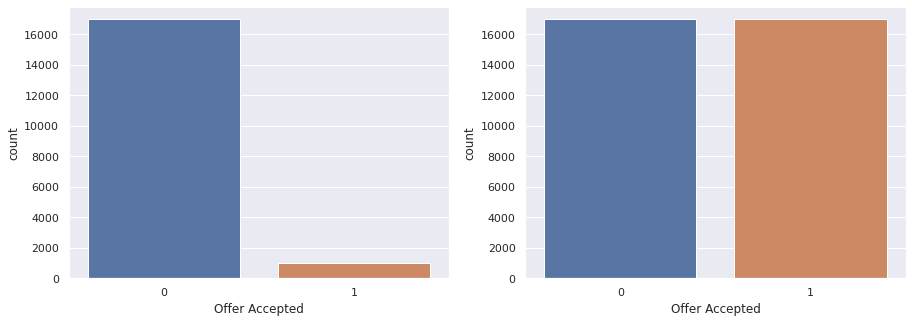

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(15,5))
sns.countplot(x=data['Offer Accepted'], ax=ax[0])
sns.countplot(x=y, ax=ax[1])

scaling

In [ ]:
# Object Scaling / Normalisasi hanya di fit ke data training

scaler = MinMaxScaler()
columns = list(X.columns)
scaler.fit(X[columns])

X_scaled = scaler.transform(X)

# jika ingin tetap dalam bentuk dataframe, nilai hasil scaling dapat di assign ke kolom awal
X[columns] = X_scaled

In [ ]:
X.head(3)

,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Air Miles,Cash Back,Points,Letter,Postcard,Income Level_encode,Overdraft Protection_encode,Credit Rating_encode,Own Your Home_encode
0,0.0,0.333333,0.0,0.375,0.507306,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.333333,0.5,0.500,0.000000,1.0,0.0,0.0,1.0,0.0,0.5,0.0,0.5,1.0
2,0.5,0.333333,0.0,0.125,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,1.0


In [ ]:
X.describe()

,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Air Miles,Cash Back,Points,Letter,Postcard,Income Level_encode,Overdraft Protection_encode,Credit Rating_encode,Own Your Home_encode
count,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000,33926.000000
mean,0.084640,0.252854,0.067117,0.290106,0.350421,0.307169,0.205005,0.252166,0.316041,0.530449,0.550734,0.142983,0.622067,0.651593
std,0.198907,0.249059,0.178273,0.133184,0.230522,0.461327,0.403711,0.434263,0.464936,0.499079,0.331334,0.324028,0.381216,0.441987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.250000,0.169713,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000
50%,0.000000,0.333333,0.000000,0.250000,0.367123,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.633705,1.000000
75%,0.000000,0.333333,0.000000,0.375000,0.500228,1.000000,0.000000,1.000000,1.000000,1.000000,0.887355,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


split train and test, test size - 20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# SVC

In [ ]:
SVM = SVC(kernel='linear')
SVM.fit(X_train, y_train)

predictions_SVM = SVM.predict(X_test)
print(classification_report(y_test, predictions_SVM))
print(accuracy_score(y_test, predictions_SVM)*100)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3451
           1       0.89      0.81      0.85      3335

    accuracy                           0.86      6786
   macro avg       0.86      0.86      0.86      6786
weighted avg       0.86      0.86      0.86      6786

85.97111700559977


Text(39.49999999999999, 0.5, 'Actual')

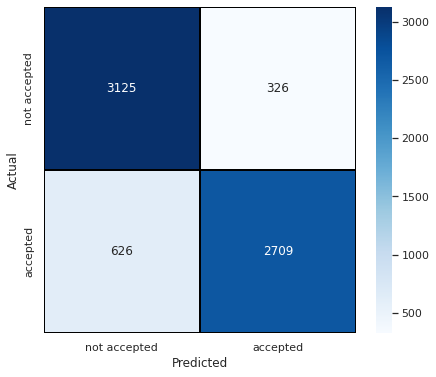

In [ ]:
svc_cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize = (7,6))
sns.heatmap(svc_cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['not accepted', 'accepted'], 
            yticklabels = ['not accepted', 'accepted'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

# LR

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

predictions_LR = LR.predict(X_test)
print(classification_report(y_test, predictions_LR))
print(accuracy_score(y_test, predictions_LR)*100)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3451
           1       0.89      0.81      0.85      3335

    accuracy                           0.86      6786
   macro avg       0.86      0.86      0.86      6786
weighted avg       0.86      0.86      0.86      6786

85.72060123784262


Text(39.49999999999999, 0.5, 'Actual')

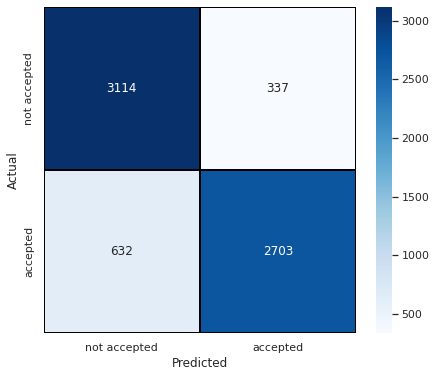

In [ ]:
lr_cm = confusion_matrix(y_test, predictions_LR)
plt.figure(figsize = (7,6))
sns.heatmap(lr_cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['not accepted', 'accepted'], 
            yticklabels = ['not accepted', 'accepted'])
plt.xlabel("Predicted")
plt.ylabel("Actual")